In [55]:
import mne
import scipy
import numpy as np
import matplotlib.pyplot as plt
import utils
import os
import glob
from scipy.stats import zscore, pearsonr
from scipy import signal
%matplotlib widget

### Data preparation

**EEG signals:** Load EEGLAB datasets -> Re-reference -> Highpass filter

**Sound envelope:** Load sound envelope

*Both band-pass filtered between 2 and 9 Hz, and downsampled to 20 Hz*

In [56]:
# Names and paths
eeg_path_head = '../../Experiments/data/AS/Audio/'
env_path_head = '../../Experiments/Audio/'
audionames, eeg_sets_paths, env_sets_paths = utils.name_paths(eeg_path_head, env_path_head)
fs = 20
band = [2, 9]
# Load single experiment
# idx = 0
# eeg_concat, envelope_concat, times = utils.load_eeg_env(idx, audionames, eeg_sets_paths, env_sets_paths, resamp_freq=fs, band=band)
# Load all experiments
eeg_concat, envelope_concat, times = utils.concatenate_eeg_env(audionames, eeg_sets_paths, env_sets_paths, resamp_freq=fs, band=band)

Reading c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\..\..\Experiments\data\AS\Audio\Occam.fdt
Reading 0 ... 357376  =      0.000 ...   698.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 sec)



c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\utils.py:422: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_lab = mne.io.read_raw_eeglab(file_path, preload=True)
c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\utils.py:422: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_lab = mne.io.read_raw_eeglab(file_path, preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 sec)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.4s finished


Reading c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\..\..\Experiments\data\AS\Audio\Threethings.fdt
Reading 0 ... 316416  =      0.000 ...   618.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 sec)



c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\utils.py:422: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_lab = mne.io.read_raw_eeglab(file_path, preload=True)
c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\utils.py:422: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_lab = mne.io.read_raw_eeglab(file_path, preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 sec)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.3s finished


Reading c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\..\..\Experiments\data\AS\Audio\Train_rob.fdt
Reading 0 ... 328704  =      0.000 ...   642.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 sec)



c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\utils.py:422: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_lab = mne.io.read_raw_eeglab(file_path, preload=True)
c:\Users\yyao\OneDrive - KU Leuven\KU Leuven\Codes\Canonical Correlation Analysis\utils.py:422: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_lab = mne.io.read_raw_eeglab(file_path, preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 sec)



[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.4s finished


### CCA

Run canonical component analysis

In [57]:
L_timefilter = int(fs)
n_components = 5
# Find the convolution matrix and run CCA (with all data)
conv_mtx = utils.convolution_mtx(L_timefilter, envelope_concat)
corr_coe, p_value, V_A, V_B = utils.cano_corr(eeg_concat, conv_mtx, n_components=n_components)
filtered_EEG = eeg_concat@V_A
filtered_Sti = conv_mtx@V_B
print('Note: no unseen data')
print('Correlation coefficients of the top {} components: {}'.format(n_components, corr_coe))
print('P-values of the top {} components: {}'.format(n_components, p_value))

Note: no unseen data
Correlation coefficients of the top 5 components: [0.11686609 0.09620335 0.07240313 0.06842679 0.06343767]
P-values of the top 5 components: [3.94214712e-119 3.56598895e-081 1.11737878e-046 7.21422346e-042
 3.23326068e-036]


In [62]:
# Cross validation
fold = 10
corr_train = np.zeros((fold, n_components))
corr_test = np.zeros((fold, n_components))
p_value_test = np.zeros((fold, n_components))
for idx in range(fold):
    EEG_train, EEG_test, Sti_train, Sti_test = utils.split(eeg_concat, envelope_concat, fold=fold, fold_idx=idx+1)
    conv_mtx_train = utils.convolution_mtx(L_timefilter, Sti_train)
    corr_train[idx,:], p_value_train, V_A_train, V_B_train = utils.cano_corr(EEG_train, conv_mtx_train, n_components=n_components)
    conv_mtx_test = utils.convolution_mtx(L_timefilter, Sti_test)
    corr_test[idx,:], p_value_test[idx,:], _, _ = utils.cano_corr(EEG_test, conv_mtx_test, n_components=n_components, V_A=V_A_train, V_B=V_B_train)
print('Average correlation coefficients of the top {} components on the training sets: {}'.format(n_components, np.average(corr_train, axis=0)))
print('Average correlation coefficients of the top {} components on the test sets: {}'.format(n_components, np.average(corr_test, axis=0)))
print('Average p-value of the top {} components on the test sets: {}'.format(n_components, np.average(p_value_test, axis=0)))

Average correlation coefficients of the top 5 components on the training sets: [0.11852258 0.09833431 0.07667584 0.07089222 0.06586683]
Average correlation coefficients of the top 5 components on the test sets: [ 0.08559859  0.05646651 -0.00213136  0.00943722  0.00889754]
Average p-value of the top 5 components on the test sets: [2.58302958e-05 4.05141766e-02 4.00758993e-01 4.03861826e-01
 2.71475442e-01]


In [59]:
corr_train

array([[0.11831682, 0.09035941, 0.07975111, 0.06824345, 0.06438539],
       [0.12028639, 0.10491074, 0.07157534, 0.06949551, 0.0639567 ],
       [0.12023875, 0.09739407, 0.07556674, 0.06847107, 0.06620744],
       [0.11755737, 0.09958202, 0.07580905, 0.06871589, 0.06454224],
       [0.11927644, 0.09648713, 0.07713647, 0.07165011, 0.06920527],
       [0.11124974, 0.10178005, 0.07716737, 0.07294964, 0.06553586],
       [0.11720848, 0.09751952, 0.07761985, 0.07229772, 0.06520084],
       [0.12087765, 0.10006568, 0.07850011, 0.07347983, 0.06761593],
       [0.12000746, 0.09651489, 0.07921414, 0.07254427, 0.06842232],
       [0.12020672, 0.09872963, 0.07441818, 0.0710747 , 0.06359635]])

In [60]:
corr_test

array([[ 0.08371959,  0.09599322, -0.02473266,  0.03865943,  0.02246812],
       [ 0.07660148,  0.02203478,  0.03754961,  0.01992586,  0.01165152],
       [ 0.07757869,  0.06375785,  0.00362783,  0.00195166,  0.05252387],
       [ 0.09607376,  0.05382096,  0.00883584,  0.03684786, -0.00681514],
       [ 0.08253627,  0.07038486, -0.00365765,  0.01295885, -0.05794353],
       [ 0.14788279,  0.02276213, -0.00115069, -0.00797429,  0.01336492],
       [ 0.09513348,  0.07548099, -0.01103332,  0.00676292,  0.03702949],
       [ 0.05934265,  0.02794115, -0.02580867, -0.01525951, -0.00427475],
       [ 0.07205071,  0.0816988 , -0.03362087, -0.01265311, -0.0206728 ],
       [ 0.0650665 ,  0.05079038,  0.02867697,  0.0131525 ,  0.04164365]])

100%|██████████| 1000/1000 [00:07<00:00, 134.58it/s]

Component 1, top 0.0%


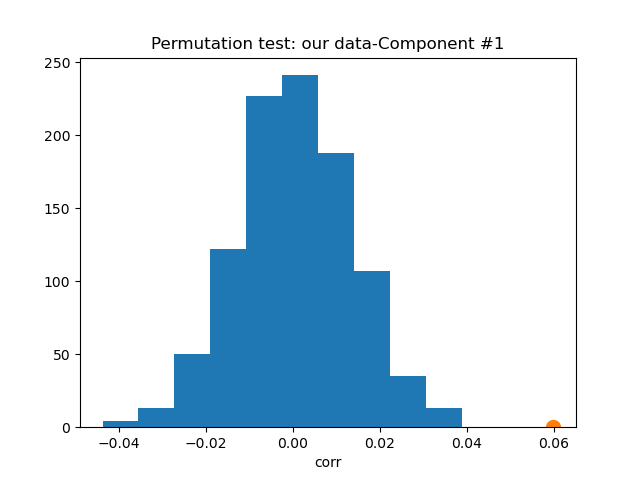

In [63]:
# Permutation test
fold = 5
idx = 4
EEG_train, EEG_test, Sti_train, Sti_test = utils.split(eeg_concat, envelope_concat, fold=fold, fold_idx=idx+1)
conv_mtx_train = utils.convolution_mtx(L_timefilter, Sti_train)
corr_train, _, V_A_train, V_B_train = utils.cano_corr(EEG_train, conv_mtx_train, n_components=n_components)
conv_mtx_test = utils.convolution_mtx(L_timefilter, Sti_test)
corr_test, _, _, _ = utils.cano_corr(EEG_test, conv_mtx_test, n_components=n_components, V_A=V_A_train, V_B=V_B_train)
num_test=1000
corr_coe_topK = utils.permutation_test(EEG_test, Sti_test, num_test, t=1, fs=fs, topK=n_components, V_A=V_A_train, V_B=V_B_train)

compo = 1
corr_coe_list = corr_coe_topK[:,compo-1]
signifi = sum(corr_coe_topK[:,compo-1]>corr_test[compo-1])/num_test*100
print("Component {compo}, top {signifi}%".format(compo=compo, signifi=signifi))
plt.hist(corr_coe_topK[:,compo-1])
plt.title('Permutation test: our data-'+'Component #'+str(compo))
plt.xlabel('corr')
plt.plot(corr_test[compo-1], 0, marker="o", markersize=10)


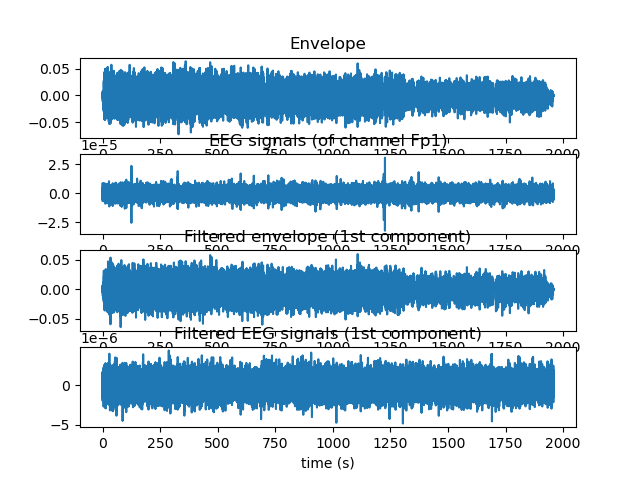

In [64]:
# Visualizations of component 1
plt.close()
compo = 1
ax1 = plt.subplot(411)
ax1.plot(times, envelope_concat)
ax1.title.set_text('Envelope')
ax2 = plt.subplot(412, sharex = ax1)
ax2.plot(times, eeg_concat[:,0])
ax2.title.set_text('EEG signals (of channel Fp1)')
ax3 = plt.subplot(413, sharex = ax1)
ax3.plot(times, filtered_Sti[:,compo-1])
ax3.title.set_text('Filtered envelope (1st component)')
ax4 = plt.subplot(414, sharex = ax1)
ax4.plot(times, filtered_EEG[:,compo-1])
ax4.title.set_text('Filtered EEG signals (1st component)')
ax4.set_xlabel('time (s)')
plt.show()

In [65]:
V_A[:,compo-1]

array([ 0.00209069,  0.00201453, -0.04934747, -0.24308365,  0.17553906,
       -0.05643217, -0.13100887, -0.02335369,  0.09100867,  0.068641  ,
       -0.004031  , -0.07716567, -0.05554256,  0.4376336 , -0.07368035,
       -0.20667459,  0.17223674,  0.14939235, -0.21654672, -0.06825779,
       -0.04702711, -0.12816029, -0.08727576,  0.00184544,  0.08556847,
        0.10265728, -0.0024895 ,  0.00418203,  0.04890037, -0.14315331,
        0.13730183,  0.19806477,  0.05930239,  0.0592281 , -0.16589976,
        0.03255697,  0.04817681, -0.13706811,  0.02061594,  0.08175743,
        0.06433429,  0.01192606, -0.04867331,  0.13171181,  0.10940868,
        0.01100609, -0.09811822, -0.        ,  0.22256432,  0.1920128 ,
        0.05642919, -0.09464066, -0.3050027 ,  0.0332234 , -0.16592196,
       -0.16730855, -0.15624806,  0.06010554,  0.00946628,  0.02377365,
        0.07156721,  0.03225246,  0.03079072,  0.05357555])

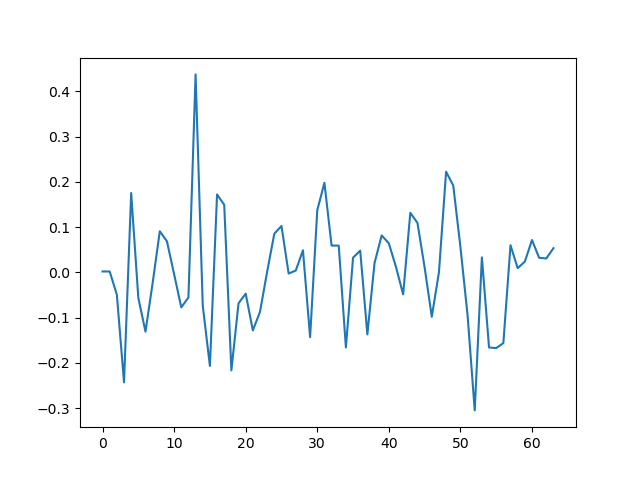

In [66]:
plt.close()
plt.plot(range(len(V_A[:,compo-1])), V_A[:,compo-1])
plt.show()

In [10]:
V_B[:,compo-1]

array([-0.10649664,  0.02975654, -0.12031577,  0.69377396, -0.02806699,
       -0.22453555,  0.54503681, -0.28994116, -0.0351004 , -0.19527192,
       -0.03141401, -0.05104283,  0.08140684,  0.00084061,  0.041946  ,
       -0.01862383,  0.01819463, -0.06785057,  0.04663885, -0.0289907 ])

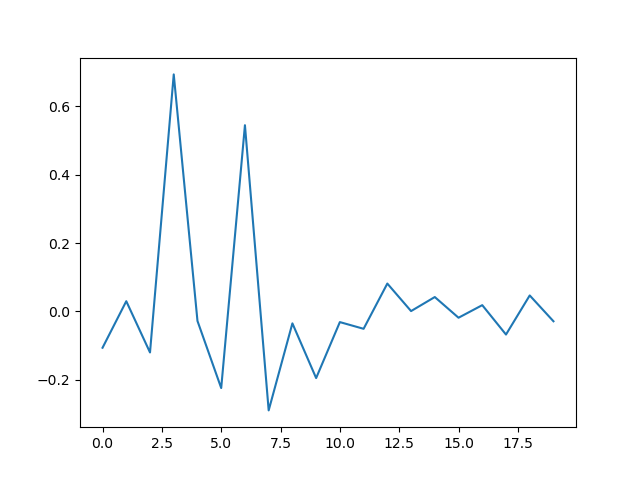

In [11]:
plt.close()
plt.plot(range(len(V_B[:,compo-1])), V_B[:,compo-1])
plt.show()